# Explore here

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#download data to csv 
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv'
pd.read_csv(url).to_csv('../data/raw/AB_NYC_2019.csv', index=False)


In [3]:
df = pd.read_csv('../data/raw/AB_NYC_2019.csv', index_col='id')
df.head()


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month              

In [6]:
#looking for duplicates in the coordinates

duplicated = df.duplicated(['latitude', 'longitude'])
total_duplicates = duplicated.sum()
print(f'There are {total_duplicates} coordinates duplicated, but it does not mean a duplicated room')


There are 24 coordinates duplicated, but it does not mean a duplicated room


In [7]:
#Looking for "fee" apartments
free = df[df['price'] <= 0]
free.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 18750597 to 21304320
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            11 non-null     object 
 1   host_id                         11 non-null     int64  
 2   host_name                       11 non-null     object 
 3   neighbourhood_group             11 non-null     object 
 4   neighbourhood                   11 non-null     object 
 5   latitude                        11 non-null     float64
 6   longitude                       11 non-null     float64
 7   room_type                       11 non-null     object 
 8   price                           11 non-null     int64  
 9   minimum_nights                  11 non-null     int64  
 10  number_of_reviews               11 non-null     int64  
 11  last_review                     10 non-null     object 
 12  reviews_per_month             

In [ ]:
#delete irrelevant colums and duplicated
#df = df.drop_duplicates(['latitude', 'longitude'])
df = df.drop(free.index) #delete free rooms
df = df.drop(['name', 'host_name', 'last_review', 'number_of_reviews', 'reviews_per_month'], axis=1)
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
id,,,,,,,,,,
2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,6,365
2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,2,355
3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,1,365
3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,1,194
5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,1,0


Text(0.5, 1.0, 'Ubications map by neighbourhood')

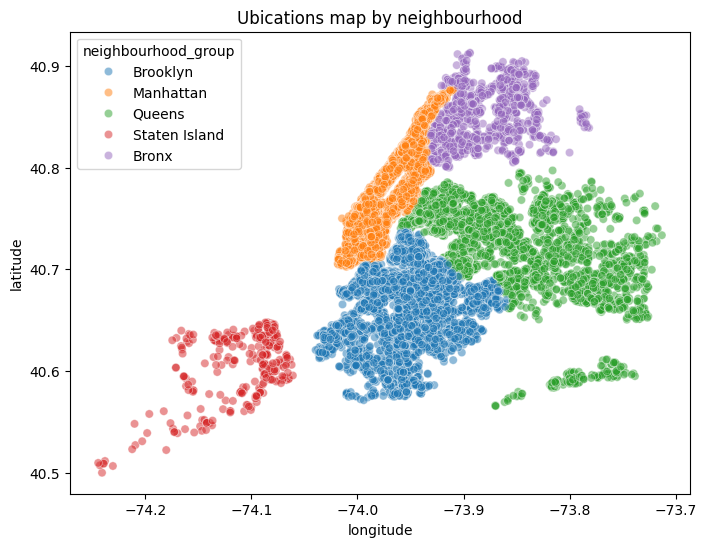

In [9]:
#ubication maps

plt.figure(figsize=(8,6))
sns.scatterplot(x= 'longitude', y= 'latitude', hue= 'neighbourhood_group', data= df, alpha= 0.5)
plt.title('Ubications map by neighbourhood')


With this map we can see the dataset is divided by 5 districts

/tmp/ipykernel_11680/666277826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df,


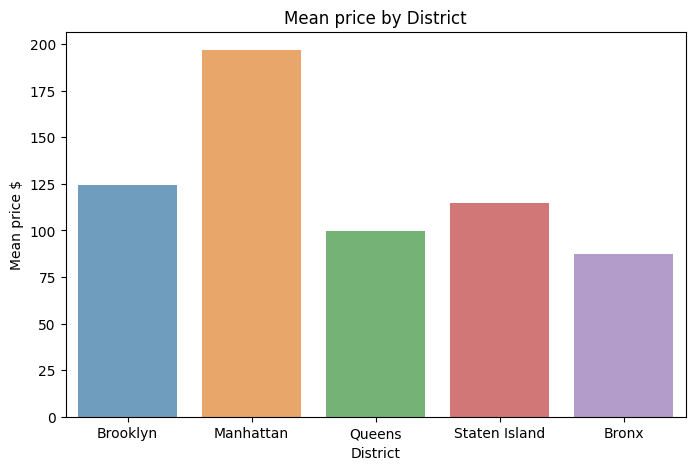

In [10]:
#mean prices by district
groups = df['neighbourhood_group'].unique()

palette = sns.color_palette() 
color_map = dict(zip(groups, palette[:len(groups)]))

plt.figure(figsize=(8,5))
sns.barplot(df, 
            x = 'neighbourhood_group', 
            y= 'price', 
            estimator = 'mean', 
            errorbar=None,
            palette=color_map,
            alpha=0.7)

plt.title('Mean price by District')
plt.xlabel('District')
plt.ylabel('Mean price $')
plt.show()

We can see Manhattan has the highest prices 

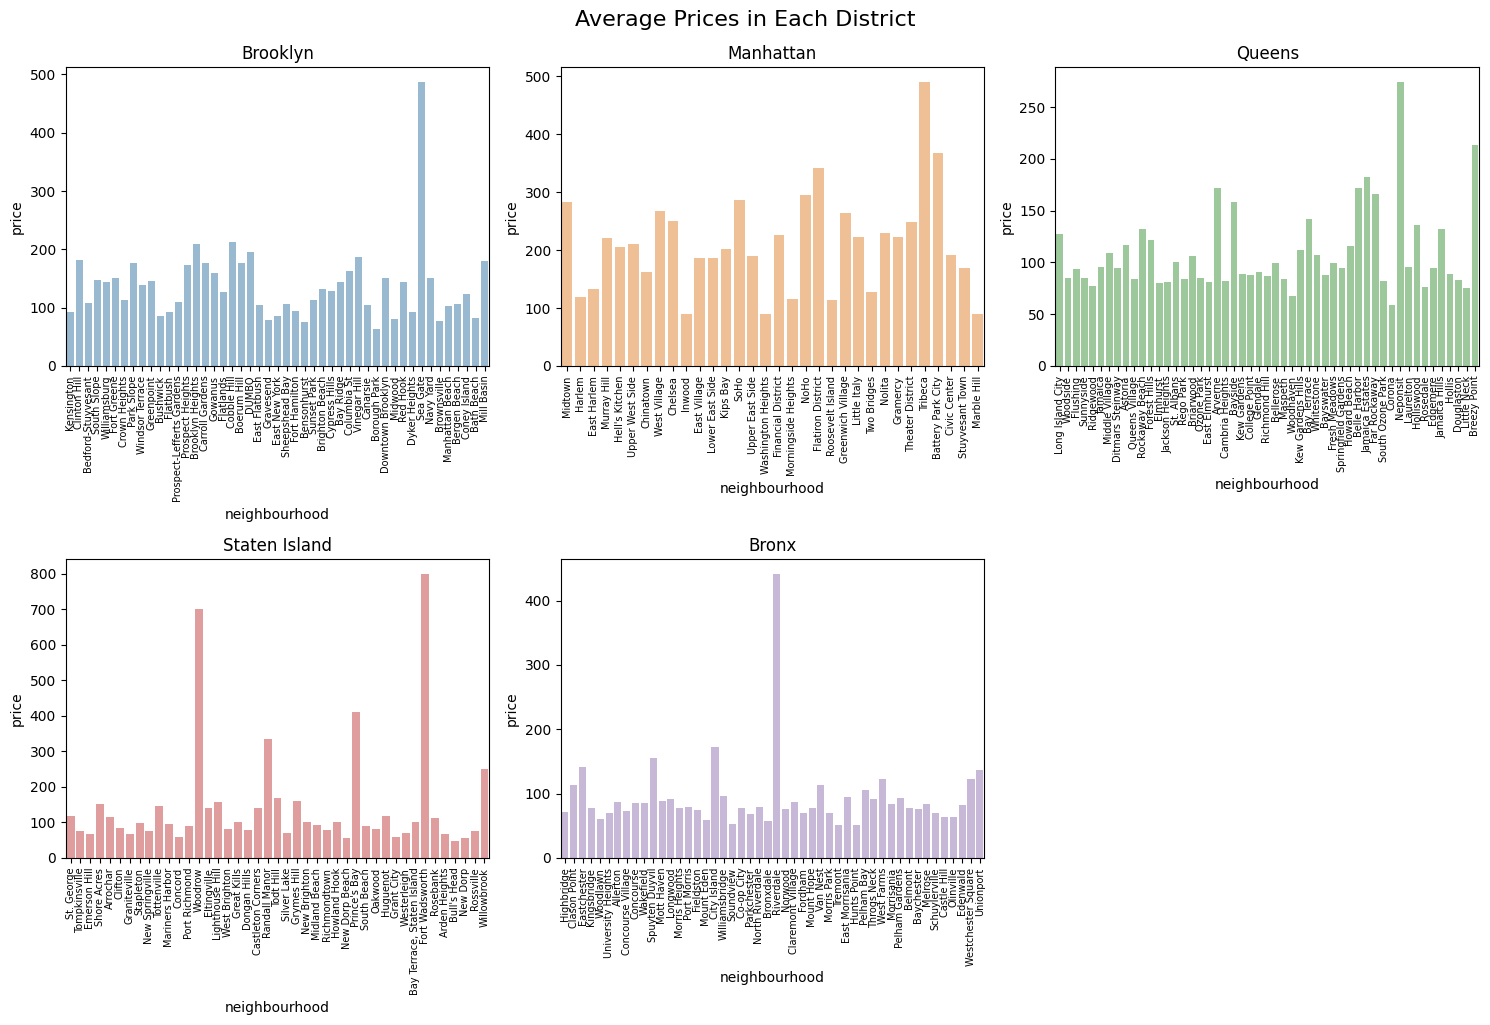

In [11]:
#prices by district
plt.figure(figsize=(15, 10))

for i, group in enumerate(groups, 1):
    subset = df[df['neighbourhood_group'] == group]
    plt.subplot(2, 3, i)
    sns.barplot(
        x='neighbourhood',
        y='price',
        data=subset,
        estimator='mean',
        alpha=0.5,
        errorbar=None,
        color=color_map[group]
    )
    plt.title(group)
    plt.xticks(rotation=90, fontsize=7)
    plt.tight_layout()

plt.suptitle('Average Prices in Each District', fontsize=16, y=1.02)
plt.show()


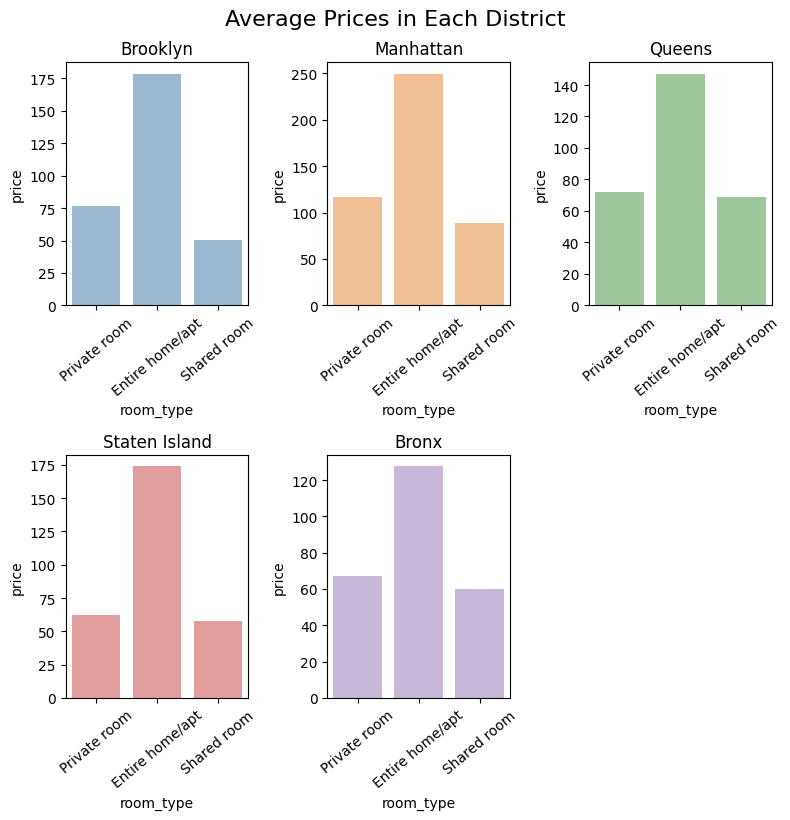

In [12]:
#leets see prices for neigborhood and room type

room_order = df['room_type'].unique()

palette = sns.color_palette() 
color_map = dict(zip(groups, palette[:len(groups)]))

plt.figure(figsize=(8, 8))

for i, group in enumerate(groups, 1):
    subset = df[df['neighbourhood_group'] == group]
    plt.subplot(2, 3, i)
    sns.barplot(
        x='room_type',
        y='price',
        data=subset,
        estimator='mean',
        alpha=0.5,
        errorbar=None,
        color=color_map[group],
        order=room_order
    )
    plt.title(group)
    plt.xticks(rotation=40, fontsize=10)
    plt.tight_layout()

plt.suptitle('Average Prices in Each District', fontsize=16, y=1.02)
plt.show()

We can see in every district the entire home is always the most expensive.

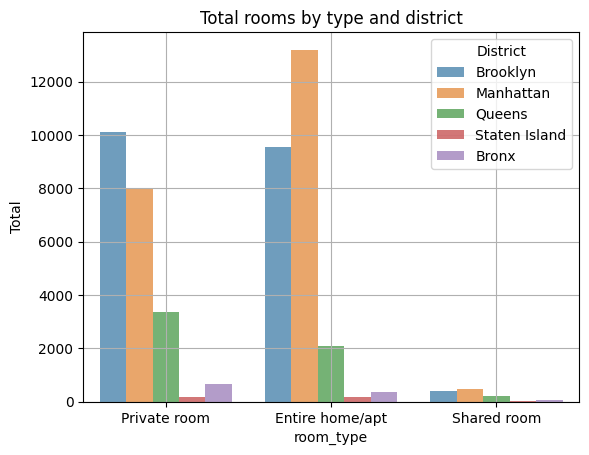

In [13]:
#total rents by room and district

sns.countplot(df, x = 'room_type', hue='neighbourhood_group', alpha = 0.7)
plt.title('Total rooms by type and district')
plt.ylabel('Total')
plt.legend(title = 'District')
plt.grid()
plt.show()

It seems not to be relevant relationship between room type and district

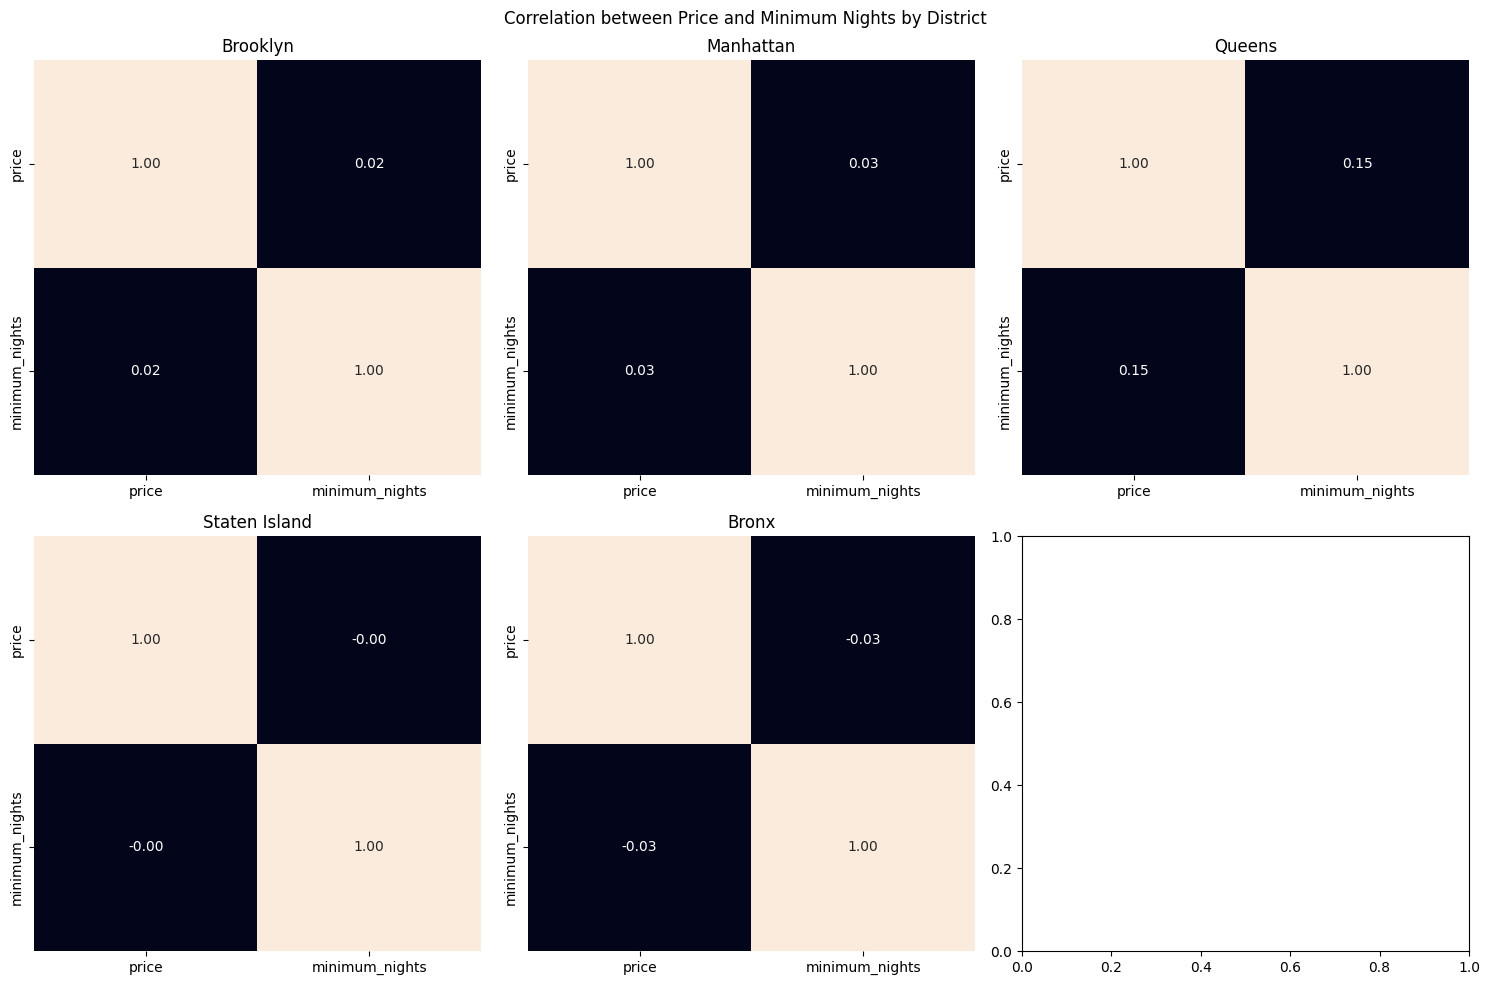

In [14]:
#relation in prices and min nights by district

fig, axis = plt.subplots(2, 3, figsize=(15, 10))
axis = axis.flatten() 

for i, group in enumerate(groups):
    subset = df[df['neighbourhood_group'] == group]
    
    # correlation matrix
    corr = subset[["price", "minimum_nights"]].corr()
    
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cbar=False,
        ax=axis[i],
        
    )
    
    axis[i].set_title(group, fontsize=12)
    axis[i].tick_params(labelsize=10)

fig.suptitle('Correlation between Price and Minimum Nights by District')
plt.tight_layout()
plt.show()


There is no relation between minimun number of nights and the price in any district

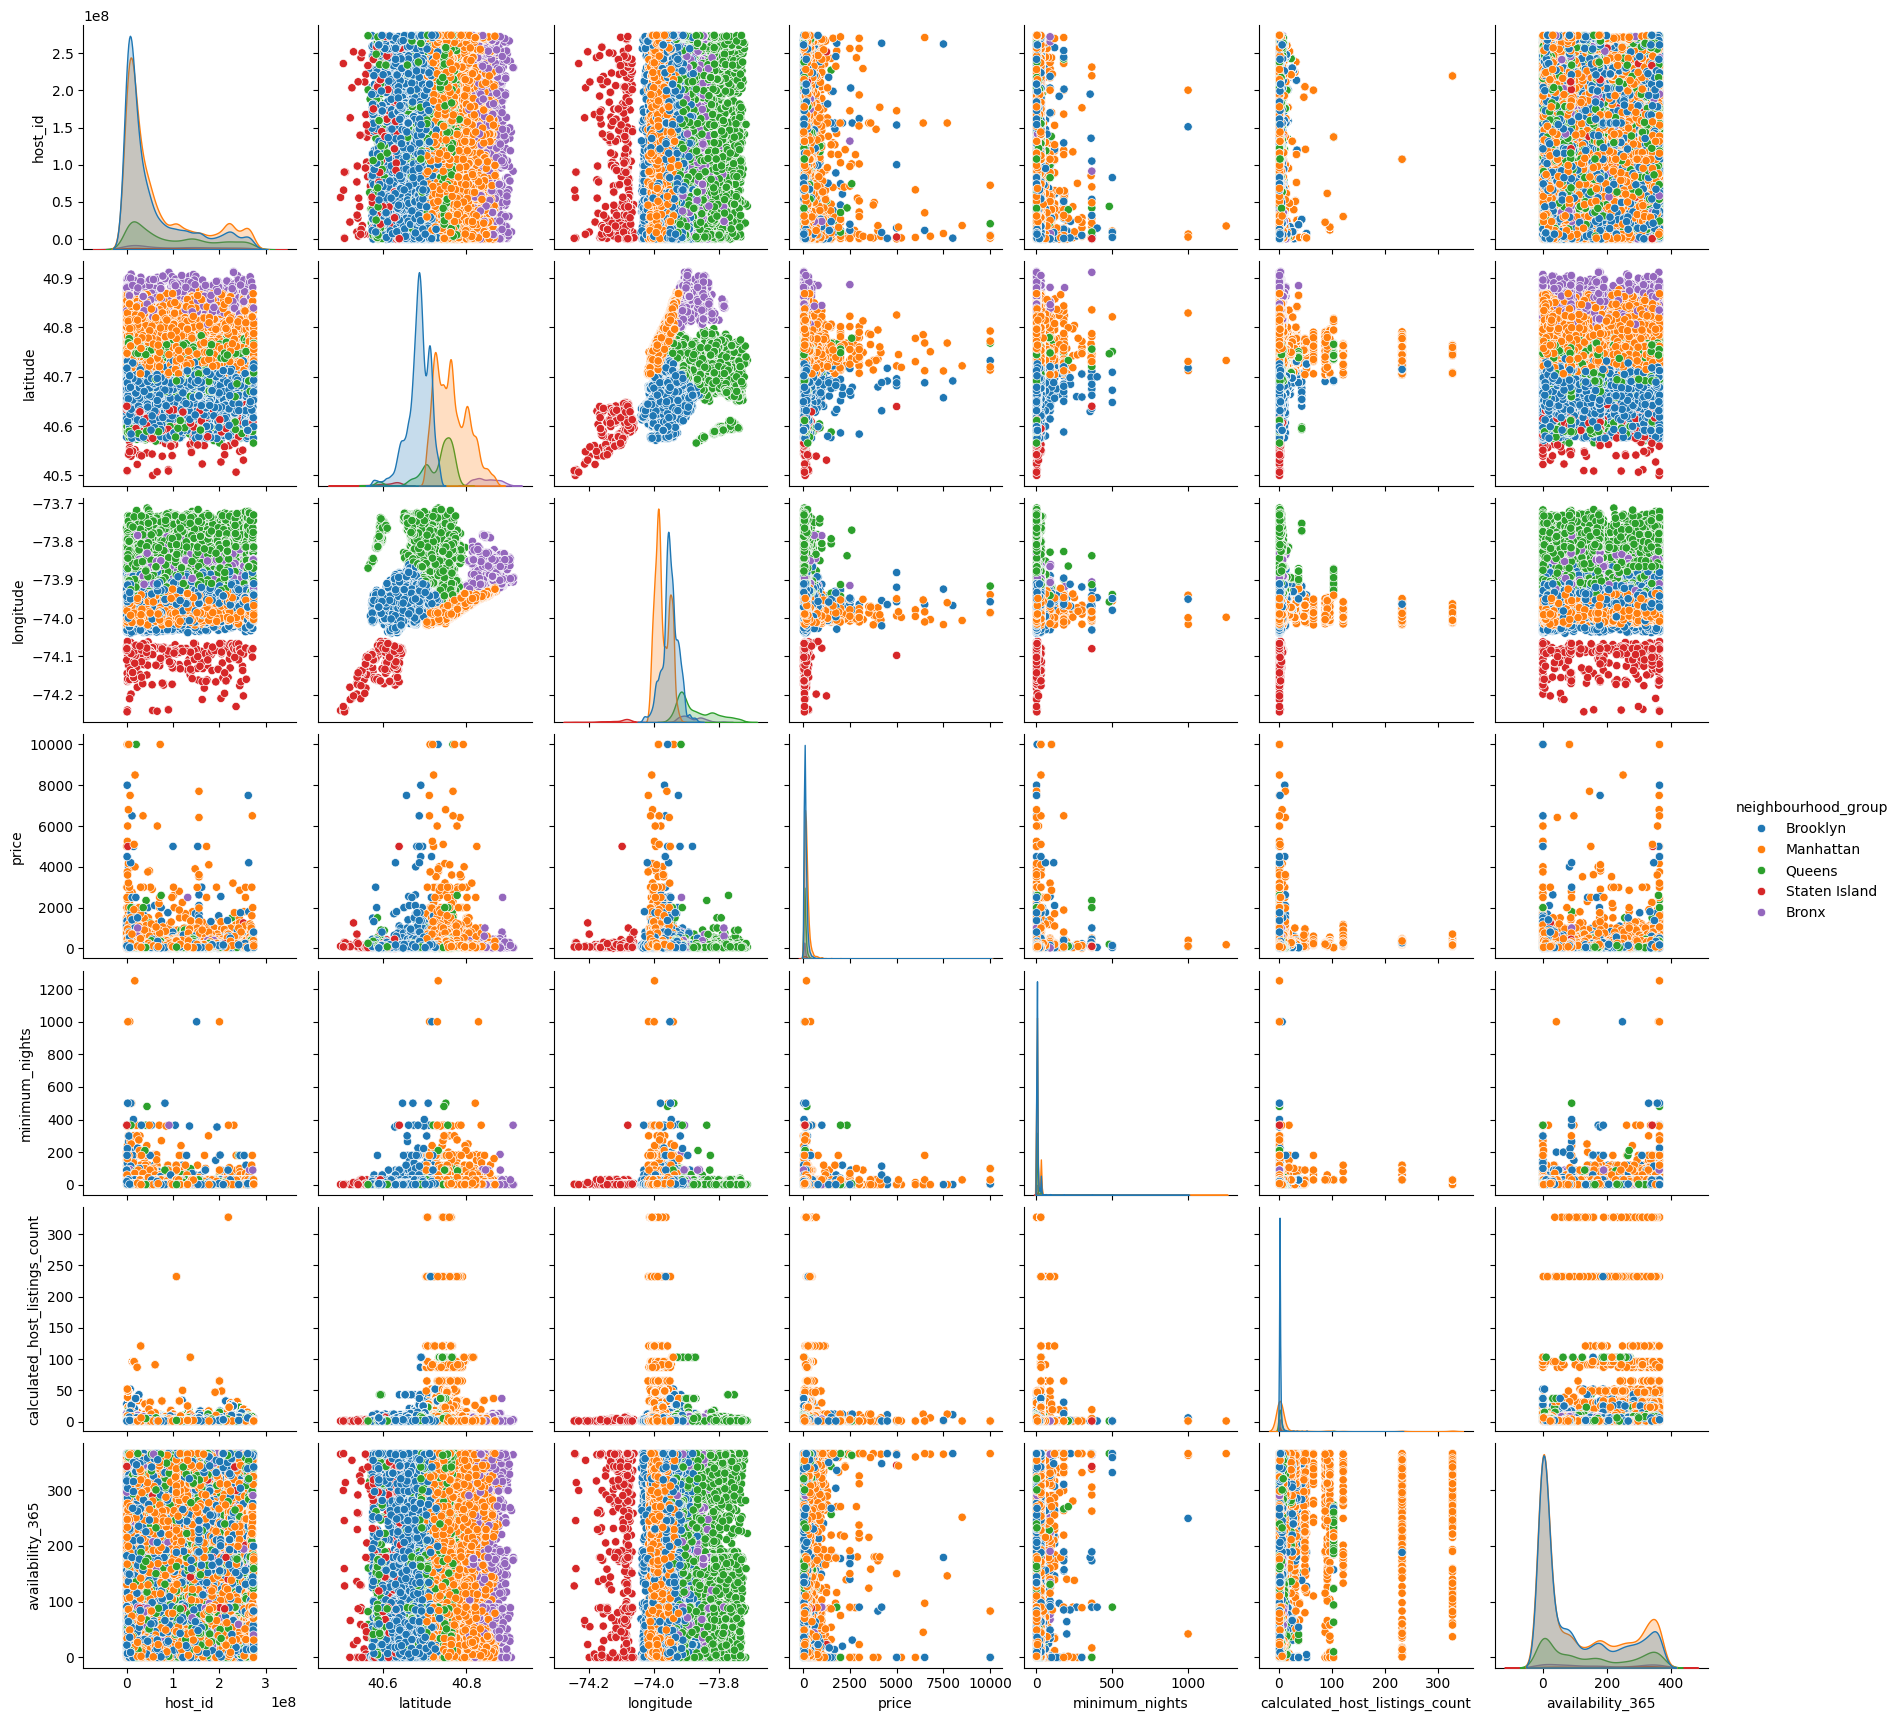

In [15]:
#pairplot to see all data
sns.pairplot(df, hue='neighbourhood_group')

In [16]:
#change categorical to num and remove categorical data

df['neighbourhood_group_n'], neighbourhood_group_index = pd.factorize(df['neighbourhood_group'])
df['neighbourhood_n'], neighbourhood_index = pd.factorize(df['neighbourhood'])
df['room_type_n'], room_type_index = pd.factorize(df['room_type'])
df = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type'], axis = 1)
df.tail(10)


,host_id,latitude,longitude,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_n,neighbourhood_n,room_type_n
id,,,,,,,,,,
36482809,131529729,40.79633,-73.93605,75,2,2,353,1,4,0
36483010,274311461,40.75561,-73.96723,200,6,1,176,1,1,1
36483152,208514239,40.71232,-73.94220,170,1,3,365,0,12,1
36484087,274321313,40.76392,-73.99183,125,4,1,31,1,7,0
36484363,107716952,40.69137,-73.80844,65,1,2,163,2,46,0
36484665,8232441,40.67853,-73.94995,70,2,2,9,0,6,0
36485057,6570630,40.70184,-73.93317,40,4,2,36,0,21,0
36485431,23492952,40.81475,-73.94867,115,10,1,27,1,2,1
36485609,30985759,40.75751,-73.99112,55,1,6,2,1,7,2


In [ ]:
#Creates csv to store clean data and index for categorical data

df.to_csv('../data/processed/clean_data.csv', index =True)

#index to restore categorical data 
pd.DataFrame({'neighbourhood_group': neighbourhood_group_index}).to_csv('../data/processed/neighbourhood_group_index.csv', index_label='code')
pd.DataFrame({'neighbourhood': neighbourhood_index}).to_csv('../data/processed/neighbourhood_index.csv', index_label='code')
pd.DataFrame({'room_type': room_type_index}).to_csv('../data/processed/room_type_index.csv', index_label='code')
